# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Quốc Thắng 
- Student ID: 22127385
- Class: 22CLC01

## Required Libraries

In [194]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Function Definitions

In [195]:
def read_img(img_path):
    im = Image.open(img_path)
    im_2D = np.array(im)
    return im_2D

def show_img(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()

def save_img(img_2d, img_path):
    Image.fromarray(np.uint8(img_2d)).save(img_path)

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
#--------------------------------------------------------------------------------

#1. Adjust Brightness: Change the brightness level of the image.
def adjust_brightness(img_2d, brightness):
    img_2d = np.uint8(img_2d) + float(brightness)
    img_2d = np.clip(img_2d, 0, 255)
    return img_2d

#2. Adjust Contrast: Change the contrast level of the image.
def adjust_contrast(img_2d, contrast):
    f = 259 * (contrast + 255) / (255 * (259 - contrast))
    img_2d = img_2d * f - 128*f
    img_2d = np.clip(img_2d, 0, 255)
    return img_2d

# 3. Flip Image:
# 3.1. Flip Horizontally: Flip the image along its vertical axis (left to right).
def flip_horizontally(img_2d):
    img_2d = np.flip(img_2d, axis=1)
    return img_2d


# 3.2. Flip Vertically: Flip the image along its horizontal axis (top to bottom).
def flip_vertically(img_2d):
    img_2d = np.flip(img_2d, axis=0)
    return img_2d

# 4. Convert Image Colors:
# 4.1. RGB to Grayscale: Convert a color image (RGB) to a grayscale image.
def convert_to_grayscale(img_2d):
    grayscale = img_2d @ np.array([0.2989, 0.5870, 0.1140])
    grayscale = np.clip(grayscale, 0, 255).astype(np.uint8)
    return grayscale

# 4.2. RGB to Sepia: Convert a color image (RGB) to a sepia-toned image.
def convert_to_sepia(img_2d):
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia = img_2d @ sepia_filter.T
    sepia = np.clip(sepia, 0, 255).astype(np.uint8)
    return sepia

#5. Blur or Sharpen Image:
# 5.1. Blur Image: Apply a blurring effect to the image. (Gausian Blur)
def blur_image(img_2d):
    kernel = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]]) / 256
    
    temp = np.zeros((img_2d.shape[0] + 4, img_2d.shape[1] + 4, img_2d.shape[2]))
    temp[2:-2, 2:-2, :] = img_2d

    for col in range(img_2d.shape[0]):
        for row in range(img_2d.shape[1]):
            for channel in range(img_2d.shape[2]):
                img_2d[col, row, channel] = (temp[col:col+5, row:row+5, channel] * kernel).sum()

    img_2d = np.clip(img_2d, 0, 255)
    
    return img_2d


# 5.2. Sharpen Image: Apply a sharpening effect to the image.
def sharpen_image(img_2d):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    img_padded = np.pad(img_2d, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)
    img_sharpen = np.zeros_like(img_2d, dtype=float)

    for channel in range(img_2d.shape[2]):
        for i in range(img_sharpen.shape[0]):
            for j in range(img_sharpen.shape[1]):
                img_sharpen[i, j, channel] = np.sum(kernel * img_padded[i:i+3, j:j+3, channel])

    return np.clip(img_sharpen, 0, 255).astype(np.uint8)

#6. Crop Image to Specific Size: Crop the image to a specified width and height . Crop in the center of the photo
def crop_image(img_2d, width, height):
    img_height, img_width, _ = img_2d.shape
    start_x = (img_width - width) // 2
    start_y = (img_height - height) // 2
    img_2d = img_2d[start_y:start_y+height, start_x:start_x+width]
    
    return img_2d


#7. Crop Image to Shape:
# 7.1. Crop to Circle: Crop the image to a circular shape. Crop in the center of the photo
def crop_to_circle(img_2d):
    img_2d = crop_image(img_2d, img_2d.shape[0], img_2d.shape[0])
    height, width, _ = img_2d.shape
    center_x = width // 2
    center_y = height // 2
    radius = min(center_x, center_y)
    y, x = np.ogrid[:height, :width]
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 > radius ** 2
    img_2d[mask] = 0
    return img_2d

# 7.2. Crop to Ellipse: Crop the image to  two diagonal ellipses. Crop in the center of the photo
def crop_to_2diagonal_ellipses(img_2d, in_width, in_height):
    img_2d = crop_image(img_2d,in_width , in_height)
    height, width, _ = img_2d.shape
    
    def create_elipse_mask(shape, a, b, center, angle=0):
        y, x = np.ogrid[:shape[0], :shape[1]]
        x_center, y_center = center

        cos_angle = np.cos(np.radians(angle))
        sin_angle = np.sin(np.radians(angle))

        elipse_mask = (((x - x_center) * cos_angle + (y - y_center) * sin_angle) ** 2 / a ** 2 +
                       ((x - x_center) * sin_angle - (y - y_center) * cos_angle) ** 2 / b ** 2) <= 1
        return elipse_mask
    
    # Create two elipse masks
    mask1 = create_elipse_mask((height, width), height*200/512, width*300/512, (width//2, height//2), 45)
    mask2 = create_elipse_mask((height, width), height*200/512, width*300/512, (width//2, height//2), 135)

    # combine two masks
    mask = mask1 | mask2

    # apply mask to image
    result_img = np.copy(img_2d)
    result_img[~mask] = 0

    return result_img

#9. Scale Image: Zoom in or out by a factor
def scale_image(img_2d, scale_factor):
    img_height, img_width, _ = img_2d.shape
    new_height = int(img_height * scale_factor)
    new_width = int(img_width * scale_factor)
    scaled_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x = int(i / scale_factor)
            y = int(j / scale_factor)
            scaled_img[i, j] = img_2d[x, y]
    
    return scaled_img

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [196]:
# YOUR CODE HERE

## Main FUNCTION

In [197]:
def main():
    img_path = input("Enter the image path: ")
    base_name = img_path.split(".")[0]

    img_2d = read_img(img_path)
    img_2d_2 = read_img(img_path)
    img_2d_3 = read_img(img_path)
    img_2d_4 = read_img(img_path)
    img_2d_5 = read_img(img_path)
    img_2d_6 = read_img(img_path)
    img_2d_7 = read_img(img_path)

    show_img(img_2d)

    print("1. Adjust brightness")
    print("2. Adjust contrast")
    print("3. Flip horizontally")
    print("4. Flip vertically")
    print("5. Convert to grayscale")
    print("6. Convert to sepia")
    print("7. Blur image")
    print("8. Sharpen image")   
    print("9. Crop image to specific size")
    print("10. Crop image to circle")
    print("11. Crop image to 2 diagonal ellipses")
    print("12. Scale image (2x)")
    print("0. Apply all")

    option = int(input("Enter the option: "))
    
    if option == 1:
        adjustedBright_img = adjust_brightness(img_2d, 50)
        new_name = base_name + "_adjusted_brightness.jpg"
        save_img(adjustedBright_img, new_name)
        
    elif option == 2:
        adjustedContrast_img = adjust_contrast(img_2d, 50)
        new_name = base_name + "_adjusted_contrast.jpg"
        save_img(adjustedContrast_img, new_name)

    elif option == 3:
        flipHorizontally_img = flip_horizontally(img_2d)
        new_name = base_name + "_flip_horizontally.jpg"
        save_img(flipHorizontally_img, new_name)
        
    elif option == 4:
        flip_img = flip_vertically(img_2d)
        new_name = base_name + "_flip_vertically.jpg"
        save_img(flip_img, new_name)

    elif option == 5:
        grayscale_img = convert_to_grayscale(img_2d)
        new_name = base_name + "_grayscale.jpg"
        save_img(grayscale_img, new_name)

    elif option == 6:
        sepia_img = convert_to_sepia(img_2d)
        new_name = base_name + "_sepia.jpg"
        save_img(sepia_img, new_name)

    elif option == 7:
        blur_img = blur_image(img_2d)
        new_name = base_name + "_blur.jpg"
        save_img(blur_img, new_name)

    elif option == 8:
        sharpen_img = sharpen_image(img_2d)
        new_name = base_name + "_sharpen.jpg"
        save_img(sharpen_img, new_name)
        
    elif option == 9:
        width = int(input("Enter the width: "))
        height = int(input("Enter the height: "))
        crop_img = crop_image(img_2d, width, height)
        new_name = base_name + "_crop.jpg"
        save_img(crop_img, new_name)

    elif option == 10:
        circle_img = crop_to_circle(img_2d)
        new_name = base_name + "_circle.jpg"
        save_img(circle_img, new_name)

    elif option == 11:
        in_width = 512 # can be input
        in_height = 512 # can be input
        ellipse_img = crop_to_2diagonal_ellipses(img_2d, in_width, in_height)
        new_name = base_name + "_ellipse.jpg"
        save_img(ellipse_img, new_name)
        
    elif option == 12:
        scale_factor = 2
        scale_img = scale_image(img_2d, scale_factor)
        new_name = base_name + "_scale.jpg"
        save_img(scale_img, new_name)
        
    elif option == 0:
        adjustedBright_img = adjust_brightness(img_2d, 50)
        bright_name = base_name + "_adjusted_brightness.jpg"
        save_img(adjustedBright_img, bright_name)
        
        adjustedContrast_img = adjust_contrast(img_2d_2, 50)
        contrast_name = base_name + "_adjusted_contrast.jpg"
        save_img(adjustedContrast_img, contrast_name)

        flipHorizontally_img = flip_horizontally(img_2d)
        flip_horizon_name = base_name + "_flip_horizontally.jpg"
        save_img(flipHorizontally_img, flip_horizon_name)
        
        flipVertically_img = flip_vertically(img_2d)
        flip_vertically_name = base_name + "_flip_vertically.jpg"
        save_img(flipVertically_img, flip_vertically_name)

        grayscale_img = convert_to_grayscale(img_2d_3)
        grayscale_name = base_name + "_grayscale.jpg"
        save_img(grayscale_img, grayscale_name)

        sepia_img = convert_to_sepia(img_2d_4)
        sepia_name = base_name + "_sepia.jpg"
        save_img(sepia_img, sepia_name)

        blur_img = blur_image(img_2d_5)
        blur_name = base_name + "_blur.jpg"
        save_img(blur_img, blur_name)

        sharpen_img = sharpen_image(img_2d_6)
        sharpen_name = base_name + "_sharpen.jpg"
        save_img(sharpen_img, sharpen_name)
        
        width = 200
        height = 200
        crop_img = crop_image(img_2d, width, height)
        crop_name = base_name + "_crop.jpg"
        save_img(crop_img, crop_name)

        circle_img = crop_to_circle(img_2d)
        circle_name = base_name + "_circle.jpg"
        save_img(circle_img, circle_name)

        in_width = 512 # can be input
        in_height = 512 # can be input
        ellipse_img = crop_to_2diagonal_ellipses(img_2d_7, in_width, in_height)
        ellipse_name = base_name + "_ellipse.jpg"
        save_img(ellipse_img, ellipse_name)
        
        scale_enlarge = 2
        scale_decrease = 0.5
        scale_img_1 = scale_image(img_2d, scale_enlarge)
        scale_img_2 = scale_image(img_2d, scale_decrease)
        scale_name_1 = base_name + "_scale_enlarge.jpg"
        scale_name_2 = base_name + "_scale_decrease.jpg"
        save_img(scale_img_1, scale_name_1)
        save_img(scale_img_2, scale_name_2)
        
    else:
        print("Invalid option!")

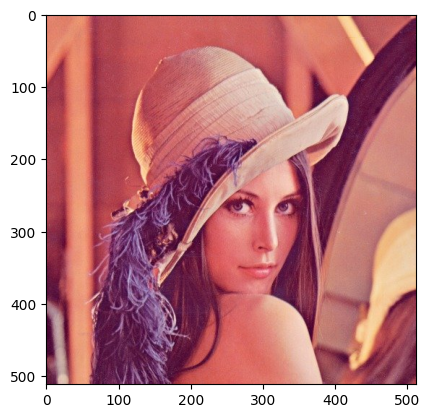

1. Adjust brightness
2. Adjust contrast
3. Flip horizontally
4. Flip vertically
5. Convert to grayscale
6. Convert to sepia
7. Blur image
8. Sharpen image
9. Crop image to specific size
10. Crop image to circle
11. Crop image to 2 diagonal ellipses
12. Scale image (2x)
0. Apply all


In [198]:
# Call main function
if __name__ == "__main__":
    main()